A Jupyter notebook for analyzing the pLDDT statistics of the AlphaFold2 and Clusters autoinhibitory and Two-Domain proteins.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scienceplots
from scipy.stats import mannwhitneyu
from statannotations.Annotator import Annotator

In [3]:
'''
Load dataframes
'''

afAuto = pd.read_csv('./project_pipeline/data/af_autoinhibited_pLDDT.tsv', sep='\t').astype('object')
afMulti = pd.read_csv('./project_pipeline/data/af_multi_domain_pLDDT.tsv', sep='\t').astype('object')
cfAuto = pd.read_csv('./project_pipeline/data/cf_autoinhibited_pLDDT.tsv', sep='\t').astype('object')
cfMulti = pd.read_csv('./project_pipeline/data/cf_multi_domain_pLDDT.tsv', sep='\t').astype('object')

# Set style
plt.style.use('science')

# Slight fixes to our dataframes to let the functions below work


afAuto = afAuto.drop(columns=['pdb', 'complex_rmsd', 'percent_region_1', 'percent_region_2', 
                    '2_aligned', '2_comp', 'conformation', 'state', 'organism', 
                    'date', 'notes'])

afMulti = afMulti.drop(columns=['mean_pae_1_1', 'mean_pae_1_2', 'mean_pae_2_2'])

cfAuto = cfAuto.drop(columns=['conformation', 'state'])

cfMulti = cfMulti.drop(columns=['mean_pae_1_1', 'mean_pae_1_2', 'mean_pae_2_2', 'af_filename'])

In [4]:

# Get the hex codes for the colors so we can assign them to categories
pal = sns.color_palette('Set1')
print(pal.as_hex())

# Set the color palette. Our categories are "Single Domain", "Two-Domain", and "Autoinhibitory"
colors = {'Single Domain': pal[0], 'Two-Domain': pal[1], 'Autoinhibitory': pal[2], 'Full': pal[3], 'Clusters': pal[7], 'Two-State AI': pal[4]}
pal.as_hex()

['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']


['#e41a1c',
 '#377eb8',
 '#4daf4a',
 '#984ea3',
 '#ff7f00',
 '#ffff33',
 '#a65628',
 '#f781bf',
 '#999999']

We pivot our dataframes in order to graph them

In [5]:
# Functions to rename columns

def rename_auto_columns(df):
    df = df.rename(columns={'complex_mean_plddt': 'Full Sequence', 'r1_mean_plddt': 'IM/D1', 'r2_mean_plddt': 'FD/D2'})

    return df

def rename_multi_columns(df):
    df = df.rename(columns={'complex_mean_plddt': 'Full Sequence', 'r1_mean_plddt': 'IM/D1', 'r2_mean_plddt': 'FD/D2'})

    return df

# Quick functions to melt dataframes
def pivot_af_df(df):

    df = df.melt(id_vars=['uniprot', 'region_1', 'region_2', 'af_filename'], var_name='Section', value_name='Mean pLDDT')
    df['Mean pLDDT'] = df['Mean pLDDT'].astype(float)

    return df

def pivot_cf_df(df):

    df = df.melt(id_vars=['uniprot', 'cluster', 'region_1', 'region_2', 'cf_filename'], var_name='Section', value_name='Mean pLDDT')
    df['Mean pLDDT'] = df['Mean pLDDT'].astype(float)

    return df

# Add signifier column
def add_auto_type(df):
    df['type'] = 'Autoinhibitory'

    return df

def add_multi_type(df):
    df['type'] = 'Two-Domain'

    return df

In [15]:
afAuto = afAuto.drop_duplicates(subset=['uniprot'])
print(len(afAuto))


123


In [7]:
# Rename columns
af_auto = rename_auto_columns(afAuto)
af_multi = rename_multi_columns(afMulti)
cf_auto = rename_auto_columns(cfAuto)
cf_multi = rename_multi_columns(cfMulti)

# Pivot dataframes
afAuto_p = pivot_af_df(af_auto)
afMulti_p = pivot_af_df(af_multi)
cfAuto_p = pivot_cf_df(cf_auto)
cfMulti_p = pivot_cf_df(cf_multi)

# Add type column
afAuto_p = add_auto_type(afAuto_p)
afMulti_p = add_multi_type(afMulti_p)
cfAuto_p = add_auto_type(cfAuto_p)
cfMulti_p = add_multi_type(cfMulti_p)

# Concatenate dataframes
af = pd.concat([afAuto_p, afMulti_p])
cf = pd.concat([cfAuto_p, cfMulti_p])

Now we chart them as boxplots

# Plot for All Autoinhibitory Proteins Compared to Multi-Domain Proteins

/tmp/ipykernel_1086803/2659350596.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

IM/D1_Autoinhibitory vs. IM/D1_Two-Domain: Mann-Whitney-Wilcoxon test two-sided, P_val:1.328e-10 U_stat=1.267e+03
Full Sequence_Autoinhibitory vs. Full Sequence_Two-Domain: Mann-Whitney-Wilcoxon test two-sided, P_val:1.824e-16 U_stat=7.060e+02
FD/D2_Autoinhibitory vs. FD/D2_Two-Domain: Mann-Whitney-Wilcoxon test two-sided, P_val:1.147e-07 U_stat=1.615e+03


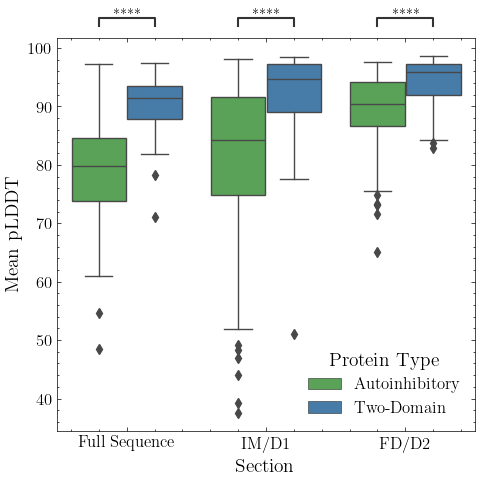

In [8]:


fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=af, x='Section', y='Mean pLDDT', ax = ax, hue='type', palette=colors)
ax.set_ylabel('Mean pLDDT', fontsize=14)
ax.set_xlabel('Section', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.legend(title='Protein Type', title_fontsize='14', fontsize='12')


# Annotate statistical significance
pairs = [[('Full Sequence', 'Autoinhibitory'), ('Full Sequence', 'Two-Domain')],
         [('IM/D1', 'Autoinhibitory'), ('IM/D1', 'Two-Domain')],
         [('FD/D2', 'Autoinhibitory'), ('FD/D2', 'Two-Domain')]]
subcat_order = ['Full Sequence', 'IM/D1', 'FD/D2']
annotator = Annotator(ax, pairs, data=af, x='Section', y='Mean pLDDT', order=subcat_order, hue='type')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

# Save the figure
plt.style.use('science')
plt.tight_layout()
plt.savefig('./project_pipeline/data/figures/af_auto_multi_plddt.png', dpi=300, bbox_inches='tight')

Let's do a boxplot for the reverse

In [9]:
# fig, ax = plt.subplots(figsize=(12, 8))
# sns.boxplot(data=af, x='type', y='Mean pLDDT', ax = ax, hue='Section', palette=colors)
# ax.set_ylabel('Mean pLDDT')
# ax.set_xlabel('Section')
# ax.legend(title='Section')

# # Annotate statistical significance
# pairs = [[('Autoinhibitory', 'Full Sequence'), ('Autoinhibitory', 'IM/D1')],
#          [('Autoinhibitory', 'Full Sequence'), ('Autoinhibitory', 'FD/D2')],
#          [('Autoinhibitory', 'IM/D1'), ('Autoinhibitory', 'FD/D2')],
#          [('Two-Domain', 'Full Sequence'), ('Two-Domain', 'IM/D1')],
#          [('Two-Domain', 'Full Sequence'), ('Two-Domain', 'FD/D2')],
#          [('Two-Domain', 'IM/D1'), ('Two-Domain', 'FD/D2')]]
# subcat_order = ['Autoinhibitory', 'Two-Domain']
# annotator = Annotator(ax, pairs, data=af, x='type', y='Mean pLDDT', order=subcat_order, hue='Section')
# annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
# annotator.apply_and_annotate()

# # Save the figure
# plt.savefig('./project_pipeline/data/figures/af_auto_multi_plddt2.png')

There are 123 proteins in the autoinhibited AlphaFold2 and 54 in the Two-Domain Alphafold2.

Now we'll look at only those proteins with two states

In [10]:
# Get list of two-state proteins
two = pd.read_csv('./project_pipeline/data/two_states.tsv', sep='\t').astype('object')
twolist = two['uniprot'].unique().tolist()

# Subset dataframe
af_two = afAuto[afAuto['uniprot'].isin(twolist)].reset_index(drop=True)

# Now rename and melt the dataframes
rename = rename_auto_columns(af_two)
af_twos = pivot_af_df(rename)
af_twos.head()

,uniprot,region_1,region_2,af_filename,Section,Mean pLDDT
0,O08967,"251-265,383-395",77-206,F-O08967-F1-model_v3.cif,Full Sequence,85.817
1,O60741,401-479,480-604,F-O60741-F1-model_v3.cif,Full Sequence,70.564
2,P07038,892-917,562-625,F-P07038-F1-model_v3.cif,Full Sequence,77.453
3,P12931,"249-269,151-248","84-145,524-536",F-P12931-F1-model_v3.cif,Full Sequence,84.513
4,P21333,2142-2235,2236-2325,F-P21333-F1-model_v3.cif,Full Sequence,77.384


Now we'll plot those proteins with two states. First we plot against multi-domain proteins

In [11]:
# Concatenate dataframes
af_twos['type'] = 'Two-State AI'
afTwoConcat = pd.concat([af_twos, afMulti_p]).reset_index(drop=True)
afTwoConcat.tail()

,uniprot,region_1,region_2,af_filename,Section,Mean pLDDT,type
208,Q63QJ1,71-219,260-558,AF-Q63QJ1-F1-model_v4.cif,FD/D2,93.937,Two-Domain
209,Q8KHY3,82-257,361-631,AF-Q8KHY3-F1-model_v4.cif,FD/D2,97.087,Two-Domain
210,Q2TU34,13-198,203-332,AF-Q2TU34-F1-model_v4.cif,FD/D2,97.772,Two-Domain
211,B7LGE4,59-204,224-301,AF-B7LGE4-F1-model_v4.cif,FD/D2,98.220,Two-Domain
212,A9T230,93-291,295-424,AF-A9T230-F1-model_v4.cif,FD/D2,96.779,Two-Domain


# Plot for Two-State Autoinhibitory Proteins Compared To Multi-Domain Proteins

/tmp/ipykernel_1086803/1244426239.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

IM/D1_Two-State AI vs. IM/D1_Two-Domain: Mann-Whitney-Wilcoxon test two-sided, P_val:3.834e-05 U_stat=1.650e+02
Full Sequence_Two-State AI vs. Full Sequence_Two-Domain: Mann-Whitney-Wilcoxon test two-sided, P_val:9.229e-06 U_stat=1.410e+02
FD/D2_Two-State AI vs. FD/D2_Two-Domain: Mann-Whitney-Wilcoxon test two-sided, P_val:1.272e-02 U_stat=2.880e+02


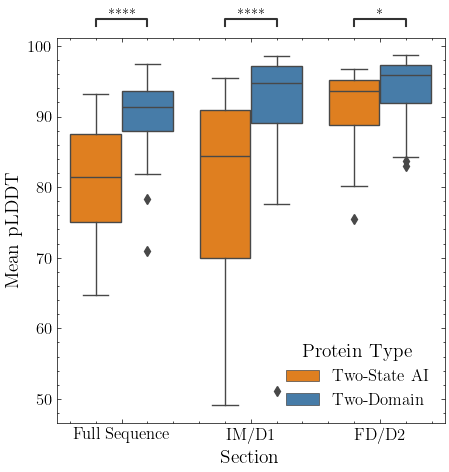

In [12]:
# Now we plot 
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(data=afTwoConcat, x='Section', y='Mean pLDDT', ax = ax, hue='type', palette=colors)
ax.set_ylabel('Mean pLDDT', fontsize=14)
ax.set_xlabel('Section', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.legend(title='Protein Type', title_fontsize='14', fontsize='12')

# Annotate statistical significance
pairs = [[('Full Sequence', 'Two-State AI'), ('Full Sequence', 'Two-Domain')],
         [('IM/D1', 'Two-State AI'), ('IM/D1', 'Two-Domain')],
         [('FD/D2', 'Two-State AI'), ('FD/D2', 'Two-Domain')]]
subcat_order = ['Full Sequence', 'IM/D1', 'FD/D2']
annotator = Annotator(ax, pairs, data=afTwoConcat, x='Section', y='Mean pLDDT', order=subcat_order, hue='type')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.savefig('./project_pipeline/data/figures/af_two_states_plddt.png')

## Autoinhibitory vs Obligate Proteins

Next, plot all autoinhibitory proteins vs obligate multi-domain proteins.

In [13]:
# Get list of obligate proteins
si = pd.read_csv('./project_pipeline/data/sidhanta_domains.csv').astype('object')
silist = si['uniprot'].unique()

# Subset dataframe
afObli_p = afMulti_p[afMulti_p['uniprot'].isin(silist)].reset_index(drop=True)

af2 = pd.concat([afAuto_p, afObli_p]).reset_index(drop=True)

si.head()

,uniprot,domains,region_1,region_2,notes
0,P0AG30,48-123,1-47,48-123,NaN
1,P23687,NaN,1-426,427-710,NaN
2,O75962,"65-210,1292-1467,1480-1591,1656-1721,1969-2145...",1292-1467,1480-1591,"Region 1 = DH1, region 2 = PH1"
3,P84135,200-416,1-199,200-416,Region 2 = Glycosyl hydrolase family 4 C-terminal
4,O69275,227-427,1-226,227-427,NaN


/tmp/ipykernel_1086803/3970762854.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


ValueError: Missing hue value `Two-Domain` in type (specified in `pairs`)

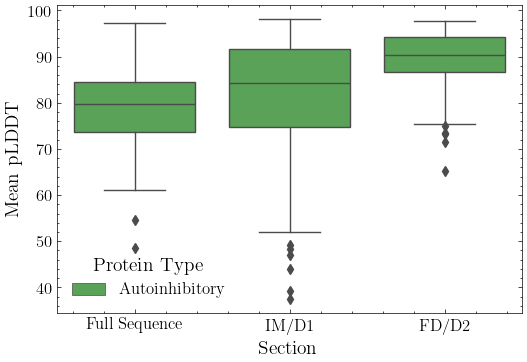

In [14]:
# Now we plot 
fig, ax = plt.subplots(figsize=(6, 4))
sns.boxplot(data=af2, x='Section', y='Mean pLDDT', ax = ax, hue='type', palette=colors)
ax.set_ylabel('Mean pLDDT', fontsize=14)
ax.set_xlabel('Section', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.legend(title='Protein Type', title_fontsize='14', fontsize='12')

# Annotate statistical significance
pairs = [[('Full Sequence', 'Autoinhibitory'), ('Full Sequence', 'Two-Domain')],
         [('IM/D1', 'Autoinhibitory'), ('IM/D1', 'Two-Domain')],
         [('FD/D2', 'Autoinhibitory'), ('FD/D2', 'Two-Domain')]]
subcat_order = ['Full Sequence', 'IM/D1', 'FD/D2']
annotator = Annotator(ax, pairs, data=af2, x='Section', y='Mean pLDDT', order=subcat_order, hue='type')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.savefig('./project_pipeline/data/figures/af_auto_obli_plddt.png')

Then we plot against the ColabFold clusters.

# Plot for Two-State Autoinhibitory Proteins Compared to ColabFold Clusters

In [ ]:
# Rename columns since we're only using autoinhibitory proteins
rename2 = af_two.rename(columns={'complex_mean_plddt': 'Full Sequence', 'r1_mean_plddt': 'IM', 'r2_mean_plddt': 'FD'})
cfAuto = cfAuto.rename(columns={'complex_mean_plddt': 'Full Sequence', 'r1_mean_plddt': 'IM', 'r2_mean_plddt': 'FD'})

# Now rename and melt the dataframes
af_twos = pivot_af_df(rename2)
cfAuto_p = pivot_cf_df(cfAuto)

# Add sources for the two dataframes
af_twos['Sequence Depth'] = 'Full'
cfAuto_p['Sequence Depth'] = 'Clusters'

two_states = pd.concat([af_twos, cfAuto_p])
two_states.head()

,uniprot,region_1,region_2,af_filename,Section,Mean pLDDT,Sequence Depth,cluster,cf_filename
0,O08967,"251-265,383-395",77-206,F-O08967-F1-model_v3.cif,Full Sequence,85.817,Full,NaN,NaN
1,O08967,"251-265,383-395",77-206,F-O08967-F1-model_v3.cif,Full Sequence,85.817,Full,NaN,NaN
2,O08967,"251-265,383-395",77-206,F-O08967-F1-model_v3.cif,Full Sequence,85.817,Full,NaN,NaN
3,O08967,"251-265,383-395",77-206,F-O08967-F1-model_v3.cif,Full Sequence,85.817,Full,NaN,NaN
4,O60741,401-479,480-604,F-O60741-F1-model_v3.cif,Full Sequence,70.564,Full,NaN,NaN


/tmp/ipykernel_1037787/1600579853.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

IM_Full vs. IM_Clusters: Mann-Whitney-Wilcoxon test two-sided, P_val:4.995e-22 U_stat=2.938e+05
Full Sequence_Full vs. Full Sequence_Clusters: Mann-Whitney-Wilcoxon test two-sided, P_val:2.165e-90 U_stat=3.788e+05
FD_Full vs. FD_Clusters: Mann-Whitney-Wilcoxon test two-sided, P_val:1.784e-99 U_stat=3.870e+05


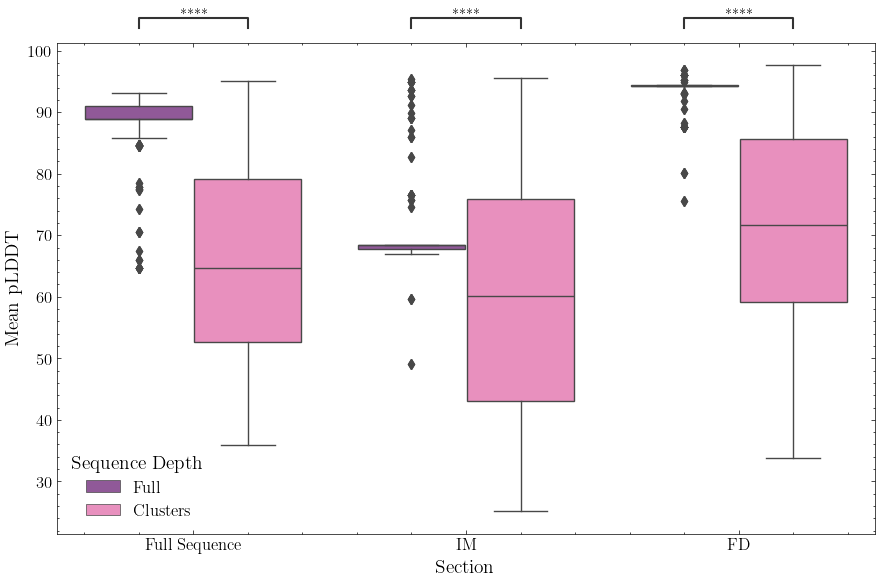

In [ ]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.boxplot(data=two_states, x='Section', y='Mean pLDDT', ax=ax, hue='Sequence Depth', palette=colors)
ax.set_xlabel('Section', fontsize=14)
ax.set_ylabel('Mean pLDDT', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.legend(title='Sequence Depth', title_fontsize='14', fontsize='12')

# Annotate statistical significance
pairs = [[('Full Sequence', 'Full'), ('Full Sequence', 'Clusters')],
         [('IM', 'Full'), ('IM', 'Clusters')],
         [('FD', 'Full'), ('FD', 'Clusters')]]

subcat_order = ['Full Sequence', 'IM', 'FD']
annotator = Annotator(ax, pairs, data=two_states, x='Section', y='Mean pLDDT', order=subcat_order, hue='Sequence Depth')
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.tight_layout()
plt.savefig('./project_pipeline/data/figures/af_cf_plddt.png')

Now we do the reverse

In [ ]:
# # Reverse Section and source in the previous plot  
# fig, ax = plt.subplots(figsize=(8, 6))
# sns.boxplot(data=two_states, x='Sequence Depth', y='Mean pLDDT', ax=ax, hue='Section', palette=colors)
# ax.set_title('Two-state Protein pLDDTs by Source')
# ax.set_xlabel('Source')
# ax.set_ylabel('Mean pLDDT')
# ax.legend(title='Section')

# # Annotate statistical significance
# pairs = [[('Full', 'Full Sequence'), ('Full', 'IM/D1')],
#          [('Full', 'Full Sequence'), ('Full', 'FD/D2')],
#          [('Full', 'IM/D1'), ('Full', 'FD/D2')],
#          [('Clusters', 'Full Sequence'), ('Clusters', 'IM/D1')],
#          [('Clusters', 'Full Sequence'), ('Clusters', 'FD/D2')],
#          [('Clusters', 'IM/D1'), ('Clusters', 'FD/D2')]]

# subcat_order = ['Full', 'Clusters']
# annotator = Annotator(ax, pairs, data=two_states, x='Sequence Depth', y='Mean pLDDT', order=subcat_order, hue='Section')
# annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
# annotator.apply_and_annotate()

# plt.savefig('./project_pipeline/data/figures/af_two_states_plddt2.png')

We're going to make a quick legend for our pLDDT figure that just has four color patches

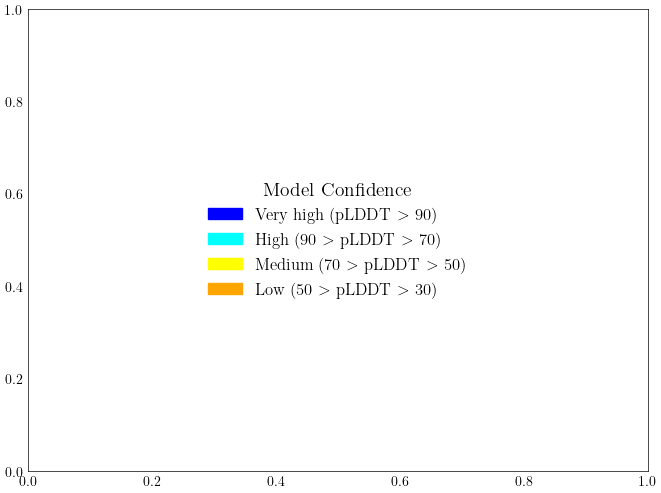

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    top=False,
    right=False
)
blue_patch = mpatches.Patch(color='blue', label='Very high (pLDDT $>$ 90)')
cyan_patch = mpatches.Patch(color='cyan', label='High (90 $>$ pLDDT $>$ 70)')
yellow_patch = mpatches.Patch(color='yellow', label='Medium (70 $>$ pLDDT $>$ 50)')
orange_patch = mpatches.Patch(color='orange', label='Low (50 $>$ pLDDT $>$ 30)')

plt.legend(handles=[blue_patch, cyan_patch, yellow_patch, orange_patch], fontsize='12', title='Model Confidence', title_fontsize='14', loc='center', bbox_to_anchor=(0.5, 0.5))
plt.show()
fig.savefig('./project_pipeline/data/figures/plddt_legend.png')